In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* how to resample your time series using `.resample()`
* how to calculate moving average using `.rolling().mean()`
* how to shift and calculate differences and percentual changes with `.shift()`, `.diff()` and `.pct_change()`


`pandas.to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=False, format=None, exact=<no_default>, unit=None, infer_datetime_format=<no_default>, origin='unix', cache=True)`

In [4]:
np.random.seed(3)
df = pd.DataFrame(data={'Col1':np.random.randint(low=20,high=35,size=24) }, 
                    index=pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'))

df

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_40435/1949799499.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'))


,Col1
2019-10-27 00:00:00,30
2019-10-27 01:00:00,28
2019-10-27 02:00:00,29
2019-10-27 03:00:00,23
2019-10-27 04:00:00,28
2019-10-27 05:00:00,28
2019-10-27 06:00:00,20
2019-10-27 07:00:00,25
2019-10-27 08:00:00,33
2019-10-27 09:00:00,23


In [6]:
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Seconds'] = df.index.second
df['Day'] = df.index.day
df['WeekDay_number'] = df.index.weekday
df['WeekDay_text'] = df.index.day_name()
df['Month_number'] = df.index.month
df['Month_short'] = df.index.month_name()
df['Year'] = df.index.year
df['Year-Month'] = df.index.to_period('M')

df.head()

,Col1,Hour,Minute,Seconds,Day,WeekDay_number,WeekDay_text,Month_number,Month_short,Year,Year-Month
2019-10-27 00:00:00,30,0,0,0,27,6,Sunday,10,October,2019,2019-10
2019-10-27 01:00:00,28,1,0,0,27,6,Sunday,10,October,2019,2019-10
2019-10-27 02:00:00,29,2,0,0,27,6,Sunday,10,October,2019,2019-10
2019-10-27 03:00:00,23,3,0,0,27,6,Sunday,10,October,2019,2019-10
2019-10-27 04:00:00,28,4,0,0,27,6,Sunday,10,October,2019,2019-10


* There are more methods for extracting datetime information, like `.microsecond`, `.is_month_start`or `.month_name()`

In [11]:
df_date = pd.DataFrame(data={'Date':pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'),
                             'Col1':np.random.randint(low=20,high=35,size=24)})

df_date.head()

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_8552/3120608757.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_date = pd.DataFrame(data={'Date':pd.date_range(start='27/10/2019 00:00:00', periods=24,freq='H'),


,Date,Col1
0,2019-10-27 00:00:00,31
1,2019-10-27 01:00:00,20
2,2019-10-27 02:00:00,25
3,2019-10-27 03:00:00,24
4,2019-10-27 04:00:00,34


* If your **date variable is not in the index** but is a column instead, you should add `.dt` to extract date information
* You should add `.dt` before the date information when indicating the datetime data is a column, not an index.

In [13]:
df_date['Hour'] = df_date['Date'].dt.hour
df_date['Minute'] = df_date['Date'].dt.minute
df_date['Year'] = df_date['Date'].dt.year
df_date.head()

,Date,Col1,Hour,Minute,Year
0,2019-10-27 00:00:00,31,0,0,2019
1,2019-10-27 01:00:00,20,1,0,2019
2,2019-10-27 02:00:00,25,2,0,2019
3,2019-10-27 03:00:00,24,3,0,2019
4,2019-10-27 04:00:00,34,4,0,2019


In [15]:
np.random.seed(seed=3)
df_index = pd.DataFrame(data={'Revenue': np.random.randint(low=20, high=35,size=28)},
                       index=pd.date_range(start='01/05/2021', periods=28, freq='D'))
df_index.head()

,Revenue
2021-01-05,30
2021-01-06,28
2021-01-07,29
2021-01-08,23
2021-01-09,28


In [17]:
df_index['Weekday'] = df_index.index.day_name()
df_index.head()

,Revenue,Weekday
2021-01-05,30,Tuesday
2021-01-06,28,Wednesday
2021-01-07,29,Thursday
2021-01-08,23,Friday
2021-01-09,28,Saturday


In [19]:
np.random.seed(seed=3)
df_column =pd.DataFrame(data={'Date': pd.date_range(start='01/29/2021', periods=28, freq='D'),
                       'Revenue': np.random.randint(low=20, high=35, size=28)})
df_column.head()

,Date,Revenue
0,2021-01-29,30
1,2021-01-30,28
2,2021-01-31,29
3,2021-02-01,23
4,2021-02-02,28


In [21]:
df_column['Month'] = df_column['Date'].dt.month_name()
df_column.head()

,Date,Revenue,Month
0,2021-01-29,30,January
1,2021-01-30,28,January
2,2021-01-31,29,January
3,2021-02-01,23,February
4,2021-02-02,28,February


## Resample

* There could be a case where your time series data is in a base time that you are not interested in working with; for example, it is HOURLY
*  based, and you are interested in changing to DAILY based.
  * You can resample your time series, set this new time base and perform aggregation for the new time base, using `.resample()`.

In [85]:
np.random.seed(seed=1)
df = pd.DataFrame(data={'Price': np.random.randint(low=20, high=35, size= 72)},
                 index=pd.date_range(start='27/10/2019 00:00:00', periods=72, freq='H'))
df

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_24541/2598171314.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start='27/10/2019 00:00:00', periods=72, freq='H'))


,Price
2019-10-27 00:00:00,25
2019-10-27 01:00:00,31
2019-10-27 02:00:00,32
2019-10-27 03:00:00,28
2019-10-27 04:00:00,29
...,...
2019-10-29 19:00:00,31
2019-10-29 20:00:00,32
2019-10-29 21:00:00,30
2019-10-29 22:00:00,24


- Use `.resample()` to change your time series base time
* The '`rule`' argument is the new frequency you are interested in. It follows the same convention we presented earlier; the documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
* Once you define the rule, you should set the aggregation function you wish to use. We selected `.mean()`. 
* In the end, the code below will get the content of DataFrame df, resample by day and calculate the mean for each day
  
`DataFrame.resample(rule, axis=<no_default>, closed=None, label=None, convention=<no_default>, kind=<no_default>, on=None, level=None, origin='start_day', offset=None, group_keys=False)`

In [134]:
# Conversion from Hourly to Daily
# rule=, defines day, month or year etc.

df_resampled = df.resample(rule='D').mean()
df_resampled

,Price
2019-10-27,27.291667
2019-10-28,27.708333
2019-10-29,26.583333


## *** Important:

In [141]:
df_sales = pd.read_csv("/Users/raihannasir/Documents/Pandas/New Materials/sales-data-set.csv")
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-05-03,21827.90,False
2,1,1,2010-05-14,18926.74,False
3,1,1,2010-05-21,14773.04,False
4,1,1,2010-05-28,15580.43,False
...,...,...,...,...,...
20472,45,98,2010-05-03,4.50,False
20473,45,98,2010-05-21,55.86,False
20474,45,98,2010-05-28,97.28,False
20475,45,98,2010-06-08,8.25,False


In [149]:
df_sales = pd.read_csv("/Users/raihannasir/Documents/Pandas/New Materials/sales-data-set.csv")
df_sales = df_sales.astype({'Date':"datetime64[s]"})
df_sales.index = df_sales['Date']
df_sales = df_sales[(df_sales['Store'] == 1) & (df_sales['Dept'] == 1)]
df_sales = df_sales.drop(["Store","Dept","Date","IsHoliday"], axis=1)
df_sales.rename(columns = {'Weekly_Sales':'Sales'},inplace=True)
df_sales

,Sales
Date,
2010-05-02,24924.50
2010-05-03,21827.90
2010-05-14,18926.74
2010-05-21,14773.04
2010-05-28,15580.43
2010-06-08,17508.41
2010-05-11,34238.88


In [151]:
df_sales = df_sales.resample(rule='M').sum()
df_sales

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_24541/572882217.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sales = df_sales.resample(rule='M').sum()


,Sales
Date,
2010-05-31,130271.49
2010-06-30,17508.41


## Moving Average
 * A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price.

In [7]:
np.random.seed(101)
df = pd.DataFrame(data={'Revenue':np.random.randint(low=200,high=350,size=15) }, 
                    index=pd.date_range(start='10/10/2020', periods=15,freq='D'))
df

,Revenue
2020-10-10,295
2020-10-11,211
2020-10-12,281
2020-10-13,270
2020-10-14,263
2020-10-15,287
2020-10-16,275
2020-10-17,337
2020-10-18,240
2020-10-19,332


* with `.rolling()`, we want to calculate the moving average for four days (`window=4`) and get the mean across the windows. 

In [10]:
df_example = df.copy()
df_example['RevenueMovingAvg'] = df_example['Revenue'].rolling(window=4).mean()
df_example

,Revenue,RevenueMovingAvg
2020-10-10,295,NaN
2020-10-11,211,NaN
2020-10-12,281,NaN
2020-10-13,270,264.25
2020-10-14,263,256.25
2020-10-15,287,275.25
2020-10-16,275,273.75
2020-10-17,337,290.50
2020-10-18,240,284.75
2020-10-19,332,296.00


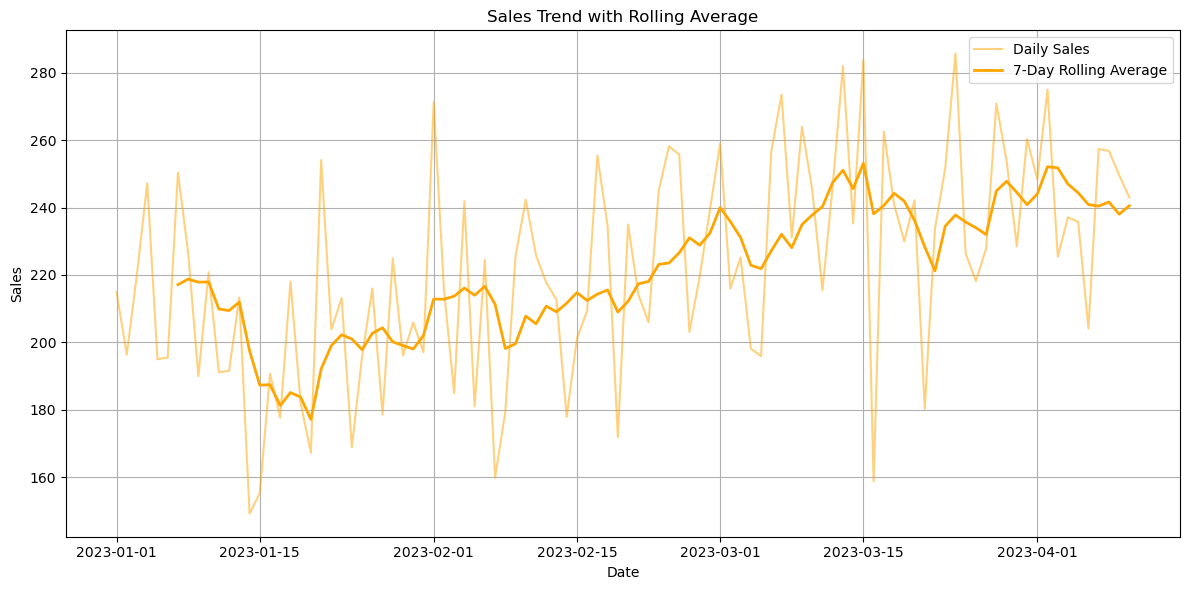

In [16]:
# Create fake time series data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100)
sales = np.random.normal(loc=200, scale=30, size=100) + np.linspace(0, 50, 100)  # trend + noise

# Create DataFrame
df = pd.DataFrame({'date': dates, 'sales': sales})

# Calculate 7-day rolling average
df['rolling_avg'] = df['sales'].rolling(window=7).mean()

# Plot original data and rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'], label='Daily Sales', color='orange', alpha=0.5)
plt.plot(df['date'], df['rolling_avg'], label='7-Day Rolling Average', color='orange', linewidth=2)
plt.title('Sales Trend with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [201]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
})
rolling_df = df.rolling(window=3)
result = rolling_df.agg(['sum', 'std', 'max'])
print(result)

      A               B          
    sum  std  max   sum  std  max
0   NaN  NaN  NaN   NaN  NaN  NaN
1   NaN  NaN  NaN   NaN  NaN  NaN
2   6.0  1.0  3.0  12.0  1.0  5.0
3   9.0  1.0  4.0   9.0  1.0  4.0
4  12.0  1.0  5.0   6.0  1.0  3.0


In [203]:
time_index = pd.date_range('20230101', periods=5, freq='D')
df = pd.DataFrame(data = [1, 2, 3, 4, 5], index = time_index)
time_rolling = df.rolling('2D').sum()
print(time_rolling)

              0
2023-01-01  1.0
2023-01-02  3.0
2023-01-03  5.0
2023-01-04  7.0
2023-01-05  9.0


## Shift

- You can shift your data by the desired number of periods.
  * This operation typically makes sense in time series data; however, it can be applied in other circumstances.
  * Use the method `.shift()` and define the number of periods to shift.

In [168]:
df_example = df.copy()
df_example['RevenueShift+1'] = df_example['Revenue'].shift(periods=1) 
df_example['Revenueshift-1'] = df_example['Revenue'].shift(periods=-1) 
df_example

,Revenue,RevenueShift+1,Revenueshift-1
2020-10-10,295,NaN,211.0
2020-10-11,211,295.0,281.0
2020-10-12,281,211.0,270.0
2020-10-13,270,281.0,263.0
2020-10-14,263,270.0,287.0
2020-10-15,287,263.0,275.0
2020-10-16,275,287.0,337.0
2020-10-17,337,275.0,240.0
2020-10-18,240,337.0,332.0
2020-10-19,332,240.0,263.0


## Difference

* We may be interested in calculating the difference between one row element and another. You can do that with `.diff().` The link to the documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)
* This is useful for getting one aspect of how your time series data is changing. In this case, you want to know how much more or less money you are making compared to the previous day
  * The '`periods`' argument is an integer and can be positive or negative
* When `period=1`, the first element will be NaN since there is no previous element to compare with

In [173]:
df_example = df.copy()
df_example['RevenueDiff1'] = df_example['Revenue'].diff(periods=1) 
df_example

,Revenue,RevenueDiff1
2020-10-10,295,NaN
2020-10-11,211,-84.0
2020-10-12,281,70.0
2020-10-13,270,-11.0
2020-10-14,263,-7.0
2020-10-15,287,24.0
2020-10-16,275,-12.0
2020-10-17,337,62.0
2020-10-18,240,-97.0
2020-10-19,332,92.0


## Percentage Change

- You can get percentual change with `.pct_change()`. The link for documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)
* The use case here, when the period is 1, is to know the percentage increase/decrease of your revenue between days
  * When `period=1`, the first element will be NaN since there is no previous element to compare with

In [183]:
df_example = df.copy()
df_example['PctChange1'] = df_example['Revenue'].pct_change(periods=1) 
df_example

,Revenue,PctChange1
2020-10-10,295,NaN
2020-10-11,211,-0.284746
2020-10-12,281,0.331754
2020-10-13,270,-0.039146
2020-10-14,263,-0.025926
2020-10-15,287,0.091255
2020-10-16,275,-0.041812
2020-10-17,337,0.225455
2020-10-18,240,-0.287834
2020-10-19,332,0.383333
